For this project, we want to perfom an EDA to better understand the context of houses in London.We will analyze parameters like their total number of rooms and how this has an influence
on the final price of the house.

There are others secondary aspects like their interior style and their antique, which can also make a hugh difference.

With this analysis, people who are looking for a property in London can have a better understanding of their respective prices and what factors they have to pay attention to make 
better decisions at the time of getting one.


In [2]:
#We import the libraries
import pandas as pd 
import seaborn as sb 

In [3]:
#Import our dataset
df = pd.read_csv(r"C:\Users\CR\Desktop\datasets_used\data_visualizations\london_houses.csv")
df.head()


,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price (£)
0,78 Regent Street,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,Electric Heating,High-level Balcony,Industrial,Garden,Marble,Renovated,2291200
1,198 Oxford Street,Westminster,2,1,123,34,Yes,No,1,Apartment,Central Heating,High-level Balcony,Industrial,City,Laminate Flooring,Old,1476000
2,18 Regent Street,Soho,5,3,168,38,No,Yes,3,Semi-Detached,Central Heating,No Balcony,Industrial,Street,Wood,Renovated,1881600
3,39 Piccadilly Circus,Islington,5,1,237,53,Yes,Yes,1,Apartment,Underfloor Heating,No Balcony,Classic,Park,Granite,Renovated,1896000
4,116 Fleet Street,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,Central Heating,No Balcony,Modern,Park,Wood,Old,1524000


In [4]:
#We clean our data dropping null values
df = df.dropna()

Suppose we want to know the total number of houses which are located in the 'Marylebone' neighbourhood.
It can be done with the following code.

In [5]:
#We get the count of values with a neighborhood called "Marylebone"
marylebone_neighborhood = df["Neighborhood"] == "Marylebone"
marylebone_neighborhood.value_counts()

Neighborhood
False    887
True     113
Name: count, dtype: int64

As we said, the total number of rooms in a house can have an influence on their price.
We can perfom a sum of bedrooms and bathrooms for each property with this code.

In [6]:
#we create a new column for count the number of rooms for each property
df["Total Rooms"] = df["Bedrooms"] + df["Bathrooms"]
df.head()

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price (£),Total Rooms
0,78 Regent Street,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,Electric Heating,High-level Balcony,Industrial,Garden,Marble,Renovated,2291200,5
1,198 Oxford Street,Westminster,2,1,123,34,Yes,No,1,Apartment,Central Heating,High-level Balcony,Industrial,City,Laminate Flooring,Old,1476000,3
2,18 Regent Street,Soho,5,3,168,38,No,Yes,3,Semi-Detached,Central Heating,No Balcony,Industrial,Street,Wood,Renovated,1881600,8
3,39 Piccadilly Circus,Islington,5,1,237,53,Yes,Yes,1,Apartment,Underfloor Heating,No Balcony,Classic,Park,Granite,Renovated,1896000,6
4,116 Fleet Street,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,Central Heating,No Balcony,Modern,Park,Wood,Old,1524000,5


We also calculate the total total area of each address.

Notice there is not a big difference, but this help us to focus on other 

In [7]:
#We get the total square meters by address and the max one
square_meters = df.groupby("Address")["Square Meters"].sum()
print(square_meters)
print("max area:",square_meters.max())


Address
1 Baker Street           216
1 Regent Street          118
10 Bond Street           229
10 Fleet Street          210
10 Park Lane             173
                        ... 
99 Bond Street           375
99 Camden High Street    191
99 Fleet Street          123
99 Oxford Street         217
99 Piccadilly Circus     132
Name: Square Meters, Length: 770, dtype: int64
max area: 739


In [8]:
df["Price (£)"] = df["Price (£)"].astype(float)
df.head()


,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price (£),Total Rooms
0,78 Regent Street,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,Electric Heating,High-level Balcony,Industrial,Garden,Marble,Renovated,2291200.0,5
1,198 Oxford Street,Westminster,2,1,123,34,Yes,No,1,Apartment,Central Heating,High-level Balcony,Industrial,City,Laminate Flooring,Old,1476000.0,3
2,18 Regent Street,Soho,5,3,168,38,No,Yes,3,Semi-Detached,Central Heating,No Balcony,Industrial,Street,Wood,Renovated,1881600.0,8
3,39 Piccadilly Circus,Islington,5,1,237,53,Yes,Yes,1,Apartment,Underfloor Heating,No Balcony,Classic,Park,Granite,Renovated,1896000.0,6
4,116 Fleet Street,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,Central Heating,No Balcony,Modern,Park,Wood,Old,1524000.0,5


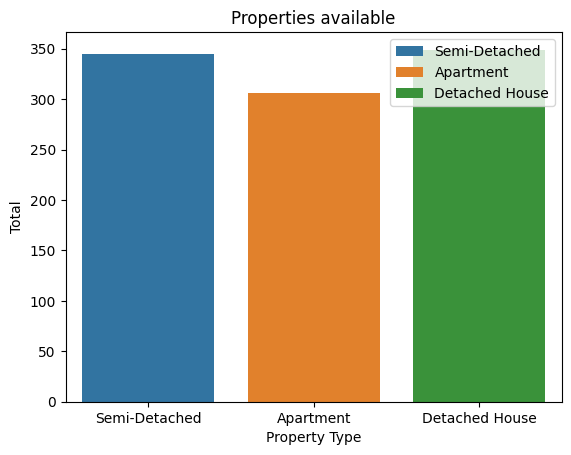

In [9]:
property_plot = sb.countplot(data=df,x="Property Type",hue="Property Type",legend="auto")
property_plot.set_title("Properties available")
property_plot.set_ylabel("Total")
property_plot.legend(["Semi-Detached","Apartment","Detached House"])

## Property Prices Lineplot 
We create a lineplot to discover if there is a relationship between the the properties antique and their final price.




Text(0.5, 1.0, 'Properties Prices')

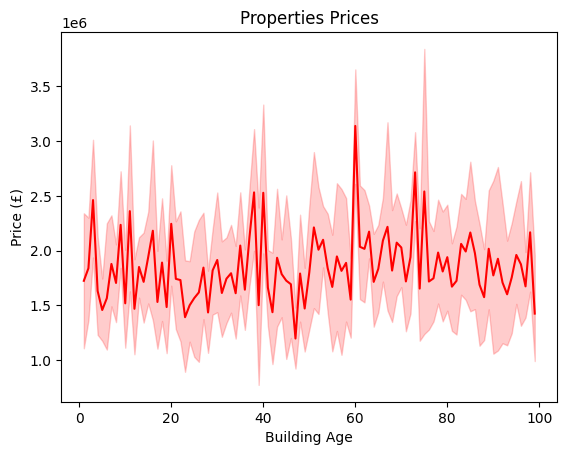

In [10]:
# We create a lineplot to see if the older the property, the higher the price.
price_lineplot = sb.lineplot(data=df,x="Building Age",y="Price (£)",dashes=True,color="r")
price_lineplot.set_title("Properties Prices")
